# 여행 관광 데이터 분석

In [1]:
from google.colab import drive 

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,595 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [3]:
filename = '/content/gdrive/MyDrive/2020_travel_senior_no_travel.csv'

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv(filename)
df = pd.DataFrame(data)
df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,213,316,419,852,859,1152,1532,1535,1856,1859,2027,2047,2057) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,SA1_6,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,D_TRA1_VAC,D_TRA1_1_SYEAR,D_TRA1_1_SMONTH,D_TRA1_1_SDAY,D_TRA1_1_EYEAR,D_TRA1_1_EMONTH,D_TRA1_1_EDAY,D_TRA1_1_SPOT,D_TRA1_1_Q6_Ar,D_TRA1_1_Q6,D_TRA1_2_SYEAR,D_TRA1_2_SMONTH,D_TRA1_2_SDAY,D_TRA1_2_EYEAR,D_TRA1_2_EMONTH,D_TRA1_2_EDAY,D_TRA1_2_SPOT,D_TRA1_2_Q6_Ar,D_TRA1_2_Q6,D_TRA1_3_SYEAR,D_TRA1_3_SMONTH,...,국내_여행방문지_관광당일1,국내_여행방문지_관광당일2,국내_여행방문지_관광당일3,국내_여행방문지_관광당일4,국내_여행방문지_관광당일5,국내_여행방문지_관광당일6,국내_여행방문지_관광당일7,국내_여행방문지_관광당일8,국내_여행방문지_관광당일9,국내_여행방문지_관광당일10,국내_여행방문지_기타전체1,국내_여행방문지_기타전체2,국내_여행방문지_기타전체3,국내_여행방문지_기타전체4,국내_여행방문지_기타전체5,국내_여행방문지_기타전체6,국내_여행방문지_기타전체7,국내_여행방문지_기타전체8,국내_여행방문지_기타전체9,국내_여행방문지_기타전체10,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10
0,11010560051_29800,1,0,0,0,0,0,Y,1,2020.00,2.00,2.00,2020.00,2.00,2.00,0,60000,3,20000,#NULL!,2020.00,2.00,2.00,2020.00,2.00,2.00,31160,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,...,9,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
1,1101057036A_70,1,0,0,0,0,0,Y,1,2020.00,1.00,25.00,2020.00,1.00,27.00,2,350000,1,350000,#NULL!,2020.00,1.00,25.00,2020.00,1.00,26.00,38360,38360,3,2020.00,1.00,26.00,2020.00,1.00,26.00,38360,#NULL!,#NULL!,2020.00,1.00,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
2,1101057036A_83,0,1,0,0,0,0,Y,2,2020.00,1.00,24.00,2020.00,1.00,27.00,3,200000,1,200000,#NULL!,2020.00,1.00,24.00,2020.00,1.00,25.00,34010,34010,12,2020.00,1.00,25.00,2020.00,1.00,26.00,34010,34010,12,2020.00,1.00,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
3,11010580161_58983,1,0,0,0,0,0,Y,1,2020.00,3.00,28.00,2020.00,3.00,28.00,0,40000,1,40000,#NULL!,2020.00,3.00,28.00,2020.00,3.00,28.00,31130,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,...,9,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
4,11010630161_85970,1,0,0,0,0,0,Y,1,2020.00,4.00,25.00,2020.00,4.00,26.00,1,150000,1,150000,#NULL!,2020.00,4.00,25.00,2020.00,4.00,26.00,35330,35330,3,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!


# 성별 여행객 수 비교

남자와 여자 여행객의 수

BSEX                    1
ID      11010560051_29800
Name: 0, dtype: object
MALE:  4158
FEMALE:  4292
TOTAL:  8450


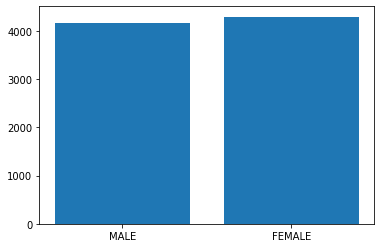

In [5]:
import matplotlib as mpl
import matplotlib.pylab as plt

df_sex = data[['BSEX', 'ID']]
print(df_sex.iloc[0, :])

m_count = 0
f_count = 0

for i in range(len(df_sex)) :
  if df_sex.iloc[i,0] == 1 :
    m_count = m_count + 1
  elif df_sex.iloc[i, 0] == 2:
    f_count = f_count + 1


print("MALE: ", m_count)
print("FEMALE: ",f_count)  
total = m_count + f_count
print("TOTAL: ", total)  

plt.bar(["MALE", "FEMALE"], [m_count, f_count])
plt.show()


# 달 마다 여행객수의 변화

달마다 얼마나 많은 사람들이 여행을 했는가?

In [6]:
import matplotlib.pyplot as plt

df_month = data[['BMON', 'ID']]
print(df_month)

m_list = []
for i in range(12) :
  m_list.append(0)


for i in range(len(df_month)) :
  if df_month.iloc[i, 0] == 1 :
    m_list[0] = m_list[0] + 1

  elif df_month.iloc[i, 0] == 2:
    m_list[1] = m_list[1] + 1
  elif df_month.iloc[i, 0] == 3:
    m_list[2] = m_list[2] + 1
  elif df_month.iloc[i, 0] == 4:
    m_list[3] = m_list[3] + 1
  elif df_month.iloc[i, 0] == 5:
    m_list[4] = m_list[4] + 1
  elif df_month.iloc[i, 0] == 6:
    m_list[5] = m_list[5] + 1
  elif df_month.iloc[i, 0] == 7:
    m_list[6] = m_list[6] + 1
  elif df_month.iloc[i, 0] == 8:
    m_list[7] = m_list[7] + 1
  elif df_month.iloc[i, 0] == 9:
    m_list[8] = m_list[8] + 1
  elif df_month.iloc[i, 0] == 10:
    m_list[9] = m_list[9] + 1
  elif df_month.iloc[i, 0] == 11:
    m_list[10] = m_list[10] + 1
  elif df_month.iloc[i, 0] == 12:
    m_list[11] = m_list[11] + 1

print(m_list)



      BMON                  ID
0      2.0   11010560051_29800
1      1.0      1101057036A_70
2      1.0      1101057036A_83
3      3.0   11010580161_58983
4      4.0   11010630161_85970
...    ...                 ...
8445   9.0  3902057133A_260716
8446   5.0  39020580191_142191
8447   6.0  39020590071_172926
8448   7.0  39020590321_202605
8449  11.0  3902059058A_344813

[8450 rows x 2 columns]
[910, 555, 424, 605, 752, 804, 850, 857, 685, 686, 676, 646]


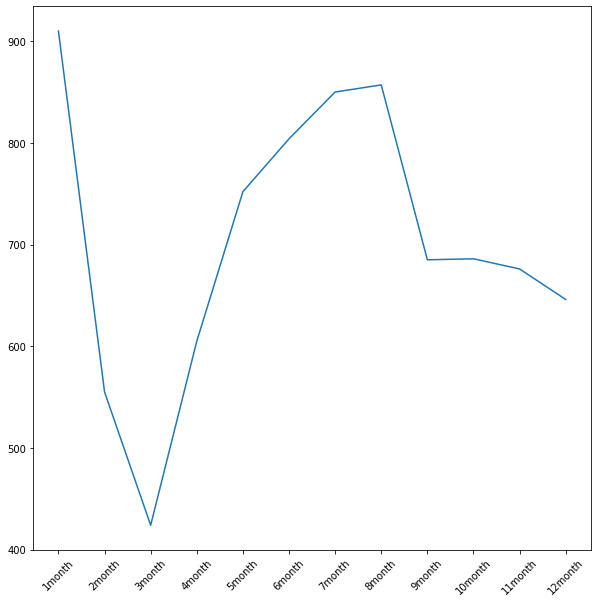

In [7]:
import matplotlib.pyplot as plt

df_month = pd.DataFrame()
df_month['month'] = [str(x) + 'month' for x in range(1, 13)]
df_month['count'] = m_list
 
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df_month['month'],df_month['count']) ## 선그래프 생성
 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.show()



# 나이에 따른 여가 활동 변화

In [8]:
df_age_4 = df.groupby('BAGE').get_group(4)
df_age_5 = df.groupby('BAGE').get_group(5)
df_age_6 = df.groupby('BAGE').get_group(6)
df_age_7 = df.groupby('BAGE').get_group(7)

In [9]:
act_list_1 = []
act_list_2 = []
act_list_3 = []
act_list_4 = []
act_list_5 = []
act_list_6 = []
act_list_7 = []
act_list_8 = []
act_list_9 = []
act_list_10 = []
act_list_11 = []
act_list_12 = []
act_list_13 = []
act_list_14 = []
act_list_15 = []
act_list_16 = []
act_list_17 = []
act_list_18 = []
act_list_19 = []

for i in range(4) :
  act_list_1.append(0)
  act_list_2.append(0)
  act_list_3.append(0)
  act_list_4.append(0)
  act_list_5.append(0)
  act_list_6.append(0)
  act_list_7.append(0)
  act_list_8.append(0)
  act_list_9.append(0)
  act_list_10.append(0)
  act_list_11.append(0)
  act_list_12.append(0)
  act_list_13.append(0)
  act_list_14.append(0)
  act_list_15.append(0)
  act_list_16.append(0)
  act_list_17.append(0)
  act_list_18.append(0)
  act_list_19.append(0)  

40대 관광 활동의 변화

In [10]:
import matplotlib.pyplot as plt

df_age_4 = df_age_4[['ID', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A5_15', 'A5_16', 'A5_17', 'A5_18', 'A5_19']]
print(df_age_4)

for i in range(len(df_age_4)) :
  
  if df_age_4.iloc[i, 1] == '1' :
    act_list_1[0] = act_list_1[0] + 1

  elif df_age_4.iloc[i, 2] == '2':
    act_list_2[0] = act_list_2[0] + 1
  
  elif df_age_4.iloc[i, 3] == '3':
    act_list_3[0] = act_list_3[0] + 1
  
  elif df_age_4.iloc[i, 4] == '4':
    act_list_4[0] = act_list_4[0] + 1
  
  elif df_age_4.iloc[i, 5] == '5':
    act_list_5[0] = act_list_5[0] + 1
  
  elif df_age_4.iloc[i, 6] == '6':
    act_list_6[0] = act_list_6[0] + 1
  
  elif df_age_4.iloc[i, 7] == '7':
    act_list_7[0] = act_list_7[0] + 1
  
  elif df_age_4.iloc[i, 8] == '8':
    act_list_8[0] = act_list_8[0] + 1
  
  elif df_age_4.iloc[i, 9] == '9':
    act_list_9[0] = act_list_9[0] + 1
  
  elif df_age_4.iloc[i, 10] == '10':
    act_list_10[0] = act_list_10[0] + 1
  
  elif df_age_4.iloc[i, 11] == '11':
    act_list_11[0] = act_list_11[0] + 1
  
  elif df_age_4.iloc[i, 12] == '12':
    act_list_12[0] = act_list_12[0] + 1

  elif df_age_4.iloc[i, 13] == '13':
    act_list_13[0] = act_list_13[0] + 1

  elif df_age_4.iloc[i, 14] == '14':
    act_list_14[0] = act_list_14[0] + 1

  elif df_age_4.iloc[i, 15] == '15':
    act_list_15[0] = act_list_15[0] + 1

  elif df_age_4.iloc[i, 16] == '16':
    act_list_16[0] = act_list_16[0] + 1

  elif df_age_4.iloc[i, 17] == '17':
    act_list_17[0] = act_list_17[0] + 1

  elif df_age_4.iloc[i, 18] == '18':
    act_list_18[0] = act_list_18[0] + 1

  elif df_age_4.iloc[i, 19] == '19':
    act_list_19[0] = act_list_19[0] + 1


                      ID    A5_1    A5_2  ...   A5_17   A5_18   A5_19
2         1101057036A_83       1       2  ...  #NULL!      18  #NULL!
3      11010580161_58983       1       2  ...  #NULL!  #NULL!  #NULL!
6      11010630161_86021       1       2  ...  #NULL!  #NULL!  #NULL!
8     11010670241_115260       1       2  ...  #NULL!  #NULL!  #NULL!
10    11010720441_174848       1       2  ...  #NULL!  #NULL!  #NULL!
...                  ...     ...     ...  ...     ...     ...     ...
8436  39020130911_260117       1       2  ...  #NULL!  #NULL!  #NULL!
8439  39020540361_113126       1  #NULL!  ...  #NULL!  #NULL!  #NULL!
8442   39020560441_84324       1       2  ...  #NULL!  #NULL!  #NULL!
8445  3902057133A_260716       1  #NULL!  ...  #NULL!  #NULL!  #NULL!
8448  39020590321_202605  #NULL!  #NULL!  ...  #NULL!      18  #NULL!

[3418 rows x 20 columns]


50대 활동의 변화

In [11]:
import matplotlib.pyplot as plt

df_age_5 = df_age_5[['ID', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A5_15', 'A5_16', 'A5_17', 'A5_18', 'A5_19']]
print(df_age_5)

for i in range(len(df_age_5)) :
  
  if df_age_5.iloc[i, 1] == '1' :
    act_list_1[1] = act_list_1[1] + 1

  elif df_age_5.iloc[i, 2] == '2':
    act_list_2[1] = act_list_2[1] + 1
  
  elif df_age_5.iloc[i, 3] == '3':
    act_list_3[1] = act_list_3[1] + 1
  
  elif df_age_5.iloc[i, 4] == '4':
    act_list_4[1] = act_list_4[1] + 1
  
  elif df_age_5.iloc[i, 5] == '5':
    act_list_5[1] = act_list_5[1] + 1
  
  elif df_age_5.iloc[i, 6] == '6':
    act_list_6[1] = act_list_6[1] + 1
  
  elif df_age_5.iloc[i, 7] == '7':
    act_list_7[1] = act_list_7[1] + 1
  
  elif df_age_5.iloc[i, 8] == '8':
    act_list_8[1] = act_list_8[1] + 1
  
  elif df_age_5.iloc[i, 9] == '9':
    act_list_9[1] = act_list_9[1] + 1
  
  elif df_age_4.iloc[i, 10] == '10':
    act_list_10[1] = act_list_10[1] + 1
  
  elif df_age_5.iloc[i, 11] == '11':
    act_list_11[1] = act_list_11[1] + 1
  
  elif df_age_5.iloc[i, 12] == '12':
    act_list_12[1] = act_list_12[1] + 1

  elif df_age_5.iloc[i, 13] == '13':
    act_list_13[1] = act_list_13[1] + 1

  elif df_age_5.iloc[i, 14] == '14':
    act_list_14[1] = act_list_14[1] + 1

  elif df_age_5.iloc[i, 15] == '15':
    act_list_15[1] = act_list_15[1] + 1

  elif df_age_5.iloc[i, 16] == '16':
    act_list_16[1] = act_list_16[1] + 1

  elif df_age_5.iloc[i, 17] == '17':
    act_list_17[1] = act_list_17[1] + 1

  elif df_age_5.iloc[i, 18] == '18':
    act_list_18[1] = act_list_18[1] + 1

  elif df_age_5.iloc[i, 19] == '19':
    act_list_19[1] = act_list_19[1] + 1


                      ID    A5_1    A5_2  ...   A5_17   A5_18   A5_19
0      11010560051_29800       1  #NULL!  ...  #NULL!  #NULL!  #NULL!
1         1101057036A_70       1  #NULL!  ...  #NULL!  #NULL!  #NULL!
4      11010630161_85970       1       2  ...  #NULL!  #NULL!  #NULL!
13     1101073123A_29465  #NULL!       2  ...  #NULL!  #NULL!  #NULL!
16    11020670481_319972       1       2  ...  #NULL!  #NULL!  #NULL!
...                  ...     ...     ...  ...     ...     ...     ...
8437  39020130911_260709       1       2  ...  #NULL!  #NULL!  #NULL!
8438  39020520031_345686  #NULL!  #NULL!  ...  #NULL!  #NULL!  #NULL!
8440   39020540361_28188  #NULL!  #NULL!  ...  #NULL!  #NULL!  #NULL!
8443  39020570841_112921  #NULL!  #NULL!  ...  #NULL!      18  #NULL!
8449  3902059058A_344813       1       2  ...  #NULL!  #NULL!  #NULL!

[2967 rows x 20 columns]


60대 활동의 변화

In [12]:
import matplotlib.pyplot as plt

df_age_6 = df_age_6[['ID', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A5_15', 'A5_16', 'A5_17', 'A5_18', 'A5_19']]
print(df_age_6)

for i in range(len(df_age_6)) :
  
  if df_age_6.iloc[i, 1] == '1' :
    act_list_1[2] = act_list_1[2] + 1

  elif df_age_6.iloc[i, 2] == '2':
    act_list_2[2] = act_list_2[2] + 1
  
  elif df_age_6.iloc[i, 3] == '3':
    act_list_3[2] = act_list_3[2] + 1
  
  elif df_age_6.iloc[i, 4] == '4':
    act_list_4[2] = act_list_4[2] + 1
  
  elif df_age_6.iloc[i, 5] == '5':
    act_list_5[2] = act_list_5[2] + 1
  
  elif df_age_6.iloc[i, 6] == '6':
    act_list_6[2] = act_list_6[2] + 1
  
  elif df_age_6.iloc[i, 7] == '7':
    act_list_7[2] = act_list_7[2] + 1
  
  elif df_age_6.iloc[i, 8] == '8':
    act_list_8[2] = act_list_8[2] + 1
  
  elif df_age_6.iloc[i, 9] == '9':
    act_list_9[2] = act_list_9[2] + 1
  
  elif df_age_6.iloc[i, 10] == '10':
    act_list_10[2] = act_list_10[2] + 1
  
  elif df_age_6.iloc[i, 11] == '11':
    act_list_11[2] = act_list_11[2] + 1
  
  elif df_age_6.iloc[i, 12] == '12':
    act_list_12[2] = act_list_12[2] + 1

  elif df_age_6.iloc[i, 13] == '13':
    act_list_13[2] = act_list_13[2] + 1

  elif df_age_6.iloc[i, 14] == '14':
    act_list_14[2] = act_list_14[2] + 1

  elif df_age_6.iloc[i, 15] == '15':
    act_list_15[2] = act_list_15[2] + 1

  elif df_age_6.iloc[i, 16] == '16':
    act_list_16[2] = act_list_16[2] + 1

  elif df_age_6.iloc[i, 17] == '17':
    act_list_17[2] = act_list_17[2] + 1

  elif df_age_6.iloc[i, 18] == '18':
    act_list_18[2] = act_list_18[2] + 1

  elif df_age_6.iloc[i, 19] == '19':
    act_list_19[2] = act_list_19[2] + 1


                      ID    A5_1    A5_2  ...   A5_17   A5_18   A5_19
5      11010630161_85977       1       2  ...  #NULL!  #NULL!  #NULL!
7     11010670241_115257  #NULL!       2  ...  #NULL!  #NULL!  #NULL!
9     11010670241_115266       1       2  ...  #NULL!  #NULL!  #NULL!
14     1101073123A_29469       1       2  ...  #NULL!  #NULL!  #NULL!
18       11020701301_127  #NULL!       2  ...  #NULL!  #NULL!  #NULL!
...                  ...     ...     ...  ...     ...     ...     ...
8421  39010650911_172856  #NULL!  #NULL!  ...  #NULL!  #NULL!  #NULL!
8422  39010651381_202642       1  #NULL!  ...  #NULL!  #NULL!  #NULL!
8433  39010670201_202692  #NULL!  #NULL!  ...  #NULL!      18  #NULL!
8441   39020560441_84300  #NULL!  #NULL!  ...  #NULL!      18  #NULL!
8446  39020580191_142191       1       2  ...  #NULL!      18  #NULL!

[1449 rows x 20 columns]


70대 활동의 변화

In [13]:
import matplotlib.pyplot as plt

df_age_7 = df_age_7[['ID', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A5_15', 'A5_16', 'A5_17', 'A5_18', 'A5_19']]
print(df_age_7)

for i in range(len(df_age_7)) :
  
  if df_age_7.iloc[i, 1] == '1' :
    act_list_1[3] = act_list_1[3] + 1

  elif df_age_7.iloc[i, 2] == '2':
    act_list_2[3] = act_list_2[3] + 1
  
  elif df_age_7.iloc[i, 3] == '3':
    act_list_3[3] = act_list_3[3] + 1
  
  elif df_age_7.iloc[i, 4] == '4':
    act_list_4[3] = act_list_4[3] + 1
  
  elif df_age_7.iloc[i, 5] == '5':
    act_list_5[3] = act_list_5[3] + 1
  
  elif df_age_7.iloc[i, 6] == '6':
    act_list_6[3] = act_list_6[3] + 1
  
  elif df_age_7.iloc[i, 7] == '7':
    act_list_7[3] = act_list_7[3] + 1
  
  elif df_age_7.iloc[i, 8] == '8':
    act_list_8[3] = act_list_8[3] + 1
  
  elif df_age_7.iloc[i, 9] == '9':
    act_list_9[3] = act_list_9[3] + 1
  
  elif df_age_7.iloc[i, 10] == '10':
    act_list_10[3] = act_list_10[3] + 1
  
  elif df_age_7.iloc[i, 11] == '11':
    act_list_11[3] = act_list_11[3] + 1
  
  elif df_age_7.iloc[i, 12] == '12':
    act_list_12[3] = act_list_12[3] + 1

  elif df_age_7.iloc[i, 13] == '13':
    act_list_13[3] = act_list_13[3] + 1

  elif df_age_7.iloc[i, 14] == '14':
    act_list_14[3] = act_list_14[3] + 1

  elif df_age_7.iloc[i, 15] == '15':
    act_list_15[3] = act_list_15[3] + 1

  elif df_age_7.iloc[i, 16] == '16':
    act_list_16[3] = act_list_16[3] + 1

  elif df_age_7.iloc[i, 17] == '17':
    act_list_17[3] = act_list_17[3] + 1

  elif df_age_7.iloc[i, 18] == '18':
    act_list_18[3] = act_list_18[3] + 1

  elif df_age_7.iloc[i, 19] == '19':
    act_list_19[3] = act_list_19[3] + 1

print(act_list_1)
print(act_list_2)
print(act_list_3)
print(act_list_4)
print(act_list_5)
print(act_list_6)
print(act_list_7)
print(act_list_8)
print(act_list_9)
print(act_list_10)
print(act_list_11)
print(act_list_12)
print(act_list_13)
print(act_list_14)
print(act_list_15)
print(act_list_16)
print(act_list_17)
print(act_list_18)
print(act_list_19)



                      ID    A5_1    A5_2  ...   A5_17   A5_18   A5_19
111   11050590441_204334       1       2  ...  #NULL!  #NULL!  #NULL!
112   11050590441_204351       1       2  ...  #NULL!  #NULL!  #NULL!
170   1106088104A_264571       1  #NULL!  ...  #NULL!  #NULL!  #NULL!
193    11070621211_58313       1       2  ...  #NULL!  #NULL!  #NULL!
211   11070721541_319464       1       2  ...  #NULL!  #NULL!  #NULL!
...                  ...     ...     ...  ...     ...     ...     ...
8329  38310400121_343996       1  #NULL!  ...  #NULL!      18  #NULL!
8333  3832012114A_231674       1       2  ...  #NULL!  #NULL!  #NULL!
8391   3901011098A_84190  #NULL!       2  ...  #NULL!      18  #NULL!
8444  3902057133A_259454       1  #NULL!  ...  #NULL!      18  #NULL!
8447  39020590071_172926       1       2  ...  #NULL!      18      19

[616 rows x 20 columns]
[2751, 2315, 1115, 429]
[313, 303, 176, 86]
[20, 37, 12, 2]
[37, 26, 14, 4]
[23, 3, 3, 2]
[154, 149, 67, 63]
[9, 6, 3, 4]
[16, 26, 4, 1

활동 리스트의 모음

1. 자연 및 풍경감상
2. 음식관광(지역맛집등)
3. 야외위락및스포츠,레포츠활동
4. 역사유적지방문
5. 테마파크,놀이시설,동/식물원방문
6. 휴식/휴양
7. 온천/스파
8. 쇼핑
9. 지역문화예술/공연/전시시설관람
10. 스포츠경기관람
11. 지역축제/이벤트참가
12. 교육/체험프로그램참가
13. 종교/성지순례
14. 카지노,경마,경륜등
15. 시티투어
16. 드라마촬영지방문
17. 유흥/오락
18. 가족/친지/친구방문
19. 회의참가/시찰

In [14]:
act_list = [act_list_1, act_list_2, act_list_3, act_list_4, act_list_5, act_list_6, act_list_7, act_list_8, act_list_9, act_list_10, act_list_11, act_list_12, act_list_13, act_list_14, act_list_15, act_list_16, act_list_17, act_list_18, act_list_19]
print(act_list)


[[2751, 2315, 1115, 429], [313, 303, 176, 86], [20, 37, 12, 2], [37, 26, 14, 4], [23, 3, 3, 2], [154, 149, 67, 63], [9, 6, 3, 4], [16, 26, 4, 1], [5, 4, 1, 0], [0, 0, 0, 0], [4, 0, 0, 0], [8, 8, 1, 0], [4, 11, 8, 2], [1, 0, 1, 0], [4, 5, 0, 1], [3, 0, 1, 0], [2, 0, 0, 0], [37, 60, 39, 15], [18, 7, 2, 1]]


퍼센트화

In [15]:
for i in range(len(act_list)) :
  for j in range(4) :
    if j == 0 :
      act_list[i][j] = act_list[i][j] / len(df_age_4)
    elif j == 1 :
      act_list[i][j] = act_list[i][j] / len(df_age_5)
    elif j == 2 :
      act_list[i][j] = act_list[i][j] / len(df_age_6)
    elif j == 3 :
      act_list[i][j] = act_list[i][j] / len(df_age_7)

print(act_list)

[[0.804856641310708, 0.7802494101786316, 0.7694962042788129, 0.6964285714285714], [0.09157401989467524, 0.10212335692618807, 0.12146307798481712, 0.1396103896103896], [0.005851375073142188, 0.01247050893158072, 0.008281573498964804, 0.003246753246753247], [0.010825043885313048, 0.008763060330299966, 0.00966183574879227, 0.006493506493506494], [0.006729081334113517, 0.0010111223458038423, 0.002070393374741201, 0.003246753246753247], [0.04505558806319485, 0.0502190765082575, 0.04623878536922015, 0.10227272727272728], [0.0026331187829139848, 0.0020222446916076846, 0.002070393374741201, 0.006493506493506494], [0.004681100058513751, 0.008763060330299966, 0.0027605244996549345, 0.0016233766233766235], [0.001462843768285547, 0.0013481631277384564, 0.0006901311249137336, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0011702750146284377, 0.0, 0.0, 0.0], [0.0023405500292568754, 0.002696326255476913, 0.0006901311249137336, 0.0], [0.0011702750146284377, 0.003707448601280755, 0.005521048999309869, 0.0032467532467

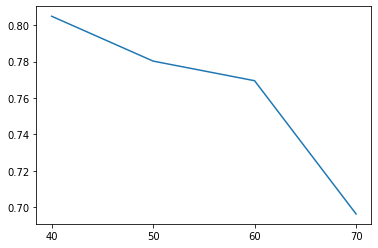

In [16]:
from matplotlib import pyplot as plt
age = ['40', '50', '60', '70']

plt.plot(age, act_list[0])


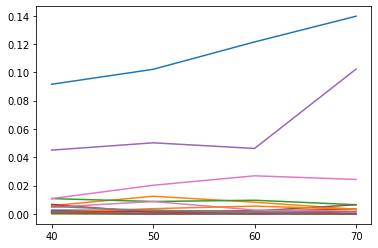

In [17]:
plt.plot(age, act_list[1])
plt.plot(age, act_list[2])
plt.plot(age, act_list[3])
plt.plot(age, act_list[4])
plt.plot(age, act_list[5])
plt.plot(age, act_list[6])
plt.plot(age, act_list[7])
plt.plot(age, act_list[8])
plt.plot(age, act_list[9])
plt.plot(age, act_list[10])
plt.plot(age, act_list[11])
plt.plot(age, act_list[12])
plt.plot(age, act_list[13])
plt.plot(age, act_list[14])
plt.plot(age, act_list[15])
plt.plot(age, act_list[16])
plt.plot(age, act_list[17])
plt.plot(age, act_list[18])
plt.show()

# 여행지 선택의 이유

1. 여행지 지명도
2. 볼거리제공
3. 저렴한여행경비
4. 이동거리
5. 여행할수있는시간
6. 숙박시설
7. 쇼핑
8. 음식
9. 교통편
10. 체험프로그램유무
11. 경험자의추천
12. 관광지편의시설
13. 교육성(교육적측면)
14. 여행동반자유

In [18]:
df_age_4 = df.groupby('BAGE').get_group(4)
df_age_5 = df.groupby('BAGE').get_group(5)
df_age_6 = df.groupby('BAGE').get_group(6)
df_age_7 = df.groupby('BAGE').get_group(7)

In [19]:


why_list = [[0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0]]

df_why = df_age_4[['ID', 'A4_1', 'A4_2', 'A4_3']]
print(df_why)


for i in range(3) :
  for j in range(len(df_why)) :
    
    if  df_why.iloc[j, i] == '1' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '2' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '3' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '4' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '5' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '6' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '7' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '8' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '9' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '10' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '11' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '12' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '13' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

    elif df_why.iloc[j, i] == '14' :
      why_list[int(df_why.iloc[j, i])-1][0] =  why_list[int(df_why.iloc[j, i])-1][0] + 1

print(why_list)

                      ID  A4_1    A4_2    A4_3
2         1101057036A_83     6       3       9
3      11010580161_58983    11       5       9
6      11010630161_86021    14       9      11
8     11010670241_115260     3       5      14
10    11010720441_174848    14       1       2
...                  ...   ...     ...     ...
8436  39020130911_260117     2      10       4
8439  39020540361_113126     1       4  #NULL!
8442   39020560441_84324    11  #NULL!  #NULL!
8445  3902057133A_260716    15  #NULL!  #NULL!
8448  39020590321_202605     2       5  #NULL!

[3418 rows x 4 columns]
[[524, 0, 0, 0], [482, 0, 0, 0], [183, 0, 0, 0], [377, 0, 0, 0], [366, 0, 0, 0], [107, 0, 0, 0], [32, 0, 0, 0], [273, 0, 0, 0], [95, 0, 0, 0], [36, 0, 0, 0], [173, 0, 0, 0], [88, 0, 0, 0], [29, 0, 0, 0], [328, 0, 0, 0]]


In [20]:

df_why = df_age_5[['ID', 'A4_1', 'A4_2', 'A4_3']]
print(df_why)


for i in range(3) :
  for j in range(len(df_why)) :
    
    if  df_why.iloc[j, i] == '1' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '2' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '3' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '4' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '5' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '6' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '7' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '8' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '9' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '10' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '11' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '12' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '13' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

    elif df_why.iloc[j, i] == '14' :
      why_list[int(df_why.iloc[j, i])-1][1] =  why_list[int(df_why.iloc[j, i])-1][1] + 1

print(why_list)

                      ID  A4_1    A4_2    A4_3
0      11010560051_29800     2       4      11
1         1101057036A_70     2       1      11
4      11010630161_85970    14      11       1
13     1101073123A_29465     9       1       4
16    11020670481_319972     4      11       1
...                  ...   ...     ...     ...
8437  39020130911_260709    11       1      14
8438  39020520031_345686    14  #NULL!  #NULL!
8440   39020540361_28188    15  #NULL!  #NULL!
8443  39020570841_112921     5      15  #NULL!
8449  3902059058A_344813     2       1       5

[2967 rows x 4 columns]
[[524, 459, 0, 0], [482, 455, 0, 0], [183, 153, 0, 0], [377, 292, 0, 0], [366, 338, 0, 0], [107, 68, 0, 0], [32, 25, 0, 0], [273, 224, 0, 0], [95, 66, 0, 0], [36, 23, 0, 0], [173, 155, 0, 0], [88, 65, 0, 0], [29, 9, 0, 0], [328, 293, 0, 0]]


In [21]:

df_why = df_age_6[['ID', 'A4_1', 'A4_2', 'A4_3']]
print(df_why)


for i in range(3) :
  for j in range(len(df_why)) :
    
    if  df_why.iloc[j, i] == '1' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '2' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '3' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '4' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '5' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '6' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '7' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '8' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '9' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '10' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '11' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '12' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '13' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

    elif df_why.iloc[j, i] == '14' :
      why_list[int(df_why.iloc[j, i])-1][2] =  why_list[int(df_why.iloc[j, i])-1][2] + 1

print(why_list)

                      ID  A4_1    A4_2    A4_3
5      11010630161_85977     3       5       4
7     11010670241_115257     4       9      14
9     11010670241_115266     5       3       9
14     1101073123A_29469     4       1  #NULL!
18       11020701301_127     2       1       5
...                  ...   ...     ...     ...
8421  39010650911_172856    11       4       5
8422  39010651381_202642     5      14       2
8433  39010670201_202692    15       5       6
8441   39020560441_84300    15  #NULL!  #NULL!
8446  39020580191_142191    15       6       5

[1449 rows x 4 columns]
[[524, 459, 176, 0], [482, 455, 183, 0], [183, 153, 80, 0], [377, 292, 153, 0], [366, 338, 183, 0], [107, 68, 34, 0], [32, 25, 12, 0], [273, 224, 116, 0], [95, 66, 48, 0], [36, 23, 8, 0], [173, 155, 88, 0], [88, 65, 33, 0], [29, 9, 3, 0], [328, 293, 170, 0]]


In [22]:

df_why = df_age_7[['ID', 'A4_1', 'A4_2', 'A4_3']]
print(df_why)


for i in range(3) :
  for j in range(len(df_why)) :
    
    if  df_why.iloc[j, i] == '1' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '2' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '3' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '4' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '5' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '6' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '7' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '8' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '9' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '10' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '11' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '12' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '13' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

    elif df_why.iloc[j, i] == '14' :
      why_list[int(df_why.iloc[j, i])-1][3] =  why_list[int(df_why.iloc[j, i])-1][3] + 1

print(why_list)

                      ID  A4_1    A4_2    A4_3
111   11050590441_204334     2      12  #NULL!
112   11050590441_204351     1      11      12
170   1106088104A_264571     8      11  #NULL!
193    11070621211_58313     6       9       2
211   11070721541_319464     8       1      12
...                  ...   ...     ...     ...
8329  38310400121_343996     6       5      14
8333  3832012114A_231674     3       8       1
8391   3901011098A_84190    14  #NULL!  #NULL!
8444  3902057133A_259454     5       1  #NULL!
8447  39020590071_172926    15       5       6

[616 rows x 4 columns]
[[524, 459, 176, 74], [482, 455, 183, 62], [183, 153, 80, 39], [377, 292, 153, 79], [366, 338, 183, 61], [107, 68, 34, 14], [32, 25, 12, 7], [273, 224, 116, 60], [95, 66, 48, 15], [36, 23, 8, 4], [173, 155, 88, 25], [88, 65, 33, 19], [29, 9, 3, 1], [328, 293, 170, 60]]


In [23]:
for i in range(len(why_list)) :
  for j in range(4) :
    if j == 0 :
      why_list[i][j] = why_list[i][j] / (len(df_age_4))
    elif j == 1 :
      why_list[i][j] = why_list[i][j] / (len(df_age_5))
    elif j == 2 :
      why_list[i][j] = why_list[i][j] / (len(df_age_6))
    elif j == 3 :
      why_list[i][j] = why_list[i][j] / (len(df_age_7))

print(why_list)

[[0.15330602691632533, 0.15470171890798787, 0.12146307798481712, 0.12012987012987013], [0.14101813926272674, 0.15335355578024942, 0.12629399585921325, 0.10064935064935066], [0.053540081919251026, 0.05156723963599596, 0.05521048999309869, 0.0633116883116883], [0.11029842012873026, 0.09841590832490732, 0.10559006211180125, 0.12824675324675325], [0.10708016383850205, 0.11391978429389957, 0.12629399585921325, 0.09902597402597403], [0.031304856641310705, 0.022918773171553757, 0.023464458247066944, 0.022727272727272728], [0.009362200117027502, 0.008426019548365353, 0.008281573498964804, 0.011363636363636364], [0.07987126974839087, 0.07549713515335356, 0.0800552104899931, 0.09740259740259741], [0.027794031597425394, 0.022244691607684528, 0.033126293995859216, 0.024350649350649352], [0.010532475131655939, 0.007751937984496124, 0.005521048999309869, 0.006493506493506494], [0.05061439438267993, 0.05224132119986518, 0.06073153899240856, 0.040584415584415584], [0.025746050321825628, 0.021907650825

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48380 missing from current font.
  font.set_

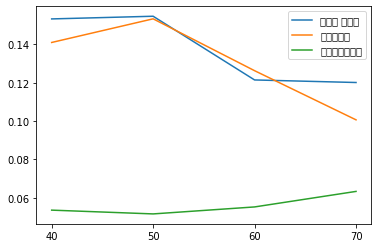

In [24]:
from matplotlib import pyplot as plt
age = ['40', '50', '60', '70']

plt.plot(age, why_list[0])
plt.plot(age, why_list[1])
plt.plot(age, why_list[2])


plt.legend(['여행지 지명도', 
            '볼거리제공', 
            '저렴한여행경비',  
            ])




/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_

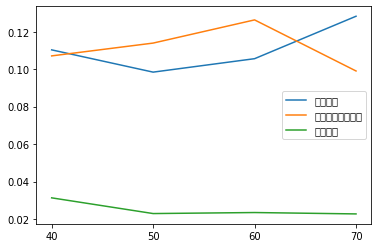

In [25]:
plt.plot(age, why_list[3])
plt.plot(age, why_list[4])
plt.plot(age, why_list[5])

plt.legend(['이동거리', 
            '여행할수있는시간', 
            '숙박시설'
            ])


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_

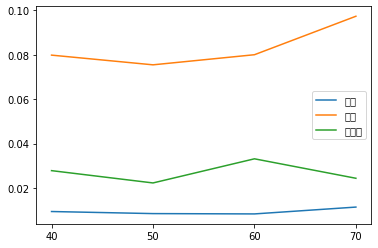

In [26]:
plt.plot(age, why_list[6])
plt.plot(age, why_list[7])
plt.plot(age, why_list[8])

plt.legend([
            '쇼핑', 
            '음식', 
            '교통편'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47016 missing from current font.
  font.set_

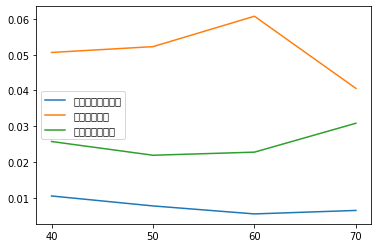

In [27]:
plt.plot(age, why_list[9])
plt.plot(age, why_list[10])
plt.plot(age, why_list[11])

plt.legend([
            '체험프로그램유무', 
            '경험자의추천', 
            '관광지편의시설'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_

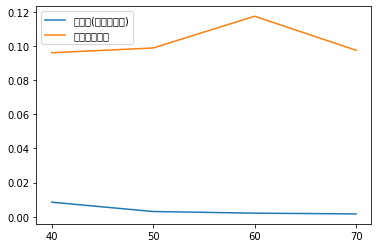

In [28]:
plt.plot(age, why_list[12])
plt.plot(age, why_list[13])

plt.legend(['교육성(교육적측면)', 
            '여행동반자유' ])


plt.legend(['여행지 지명도', 
            '볼거리제공', 
            '저렴한여행경비',  
            '이동거리', 
            '여행할수있는시간', 
            '숙박시설', 
            '쇼핑', 
            '음식', 
            '교통편', 
            '체험프로그램유무', 
            '경험자의추천', 
            '관광지편의시설',
            '교육성(교육적측면)',
            '여행동반자유'
            ])


# 여행의 거리

In [29]:
df_age_4 = df.groupby('BAGE').get_group(4)
df_age_5 = df.groupby('BAGE').get_group(5)
df_age_6 = df.groupby('BAGE').get_group(6)
df_age_7 = df.groupby('BAGE').get_group(7)

# 참고 인터넷 사이트

나이 대 별 참고 인터넷 사이트

1. 포털사이트(네이버, 다음, 구글 등)
2. 여행및숙박전문사이트또는앱
(트립어드바이저,호텔스닷컴등)
3. SNS(페이스북,인스타그램등)
4. 동영상사이트(유튜브등)
5. 여행관련블로그
6. 여행사홈페이지
7. 공공기관홈페이지
8. 개별관광지또는관광시설홈페이지


In [30]:
df_age_4 = df.groupby('BAGE').get_group(4)
df_age_5 = df.groupby('BAGE').get_group(5)
df_age_6 = df.groupby('BAGE').get_group(6)
df_age_7 = df.groupby('BAGE').get_group(7)

In [31]:
site_list= [[0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0]]

In [32]:
df_site = df_age_4[['ID', 'A6A_1', 'A6A_2', 'A6A_3']]
print(df_site)


for i in range(3) :
  for j in range(len(df_site)) :
    
    if  df_site.iloc[j, i] == '1' :
      site_list[int(df_site.iloc[j, i])-1][0] =  site_list[int(df_site.iloc[j, i])-1][0] + 1

    elif df_site.iloc[j, i] == '2' :
      site_list[int(df_site.iloc[j, i])-1][0] =  site_list[int(df_site.iloc[j, i])-1][0] + 1

    elif df_site.iloc[j, i] == '3' :
      site_list[int(df_site.iloc[j, i])-1][0] =  site_list[int(df_site.iloc[j, i])-1][0] + 1

    elif df_site.iloc[j, i] == '4' :
      site_list[int(df_site.iloc[j, i])-1][0] =  site_list[int(df_site.iloc[j, i])-1][0] + 1

    elif df_site.iloc[j, i] == '5' :
      site_list[int(df_site.iloc[j, i])-1][0] =  site_list[int(df_site.iloc[j, i])-1][0] + 1

    elif df_site.iloc[j, i] == '6' :
      site_list[int(df_site.iloc[j, i])-1][0] =  site_list[int(df_site.iloc[j, i])-1][0] + 1

    elif df_site.iloc[j, i] == '7' :
      site_list[int(df_site.iloc[j, i])-1][0] =  site_list[int(df_site.iloc[j, i])-1][0] + 1

    elif df_site.iloc[j, i] == '8' :
      site_list[int(df_site.iloc[j, i])-1][0] =  site_list[int(df_site.iloc[j, i])-1][0] + 1

    
print(site_list)

                      ID   A6A_1   A6A_2   A6A_3
2         1101057036A_83       1  #NULL!  #NULL!
3      11010580161_58983       1  #NULL!  #NULL!
6      11010630161_86021       1  #NULL!  #NULL!
8     11010670241_115260       5       6       1
10    11010720441_174848       2       1  #NULL!
...                  ...     ...     ...     ...
8436  39020130911_260117       1  #NULL!  #NULL!
8439  39020540361_113126  #NULL!  #NULL!  #NULL!
8442   39020560441_84324  #NULL!  #NULL!  #NULL!
8445  3902057133A_260716  #NULL!  #NULL!  #NULL!
8448  39020590321_202605       1       3       6

[3418 rows x 4 columns]
[[505, 0, 0, 0], [35, 0, 0, 0], [86, 0, 0, 0], [61, 0, 0, 0], [118, 0, 0, 0], [16, 0, 0, 0], [18, 0, 0, 0], [27, 0, 0, 0]]


In [33]:
df_site = df_age_5[['ID', 'A6A_1', 'A6A_2', 'A6A_3']]
print(df_site)


for i in range(3) :
  for j in range(len(df_site)) :
    
    if  df_site.iloc[j, i] == '1' :
      site_list[int(df_site.iloc[j, i])-1][1] =  site_list[int(df_site.iloc[j, i])-1][1] + 1

    elif df_site.iloc[j, i] == '2' :
      site_list[int(df_site.iloc[j, i])-1][1] =  site_list[int(df_site.iloc[j, i])-1][1] + 1

    elif df_site.iloc[j, i] == '3' :
      site_list[int(df_site.iloc[j, i])-1][1] =  site_list[int(df_site.iloc[j, i])-1][1] + 1

    elif df_site.iloc[j, i] == '4' :
      site_list[int(df_site.iloc[j, i])-1][1] =  site_list[int(df_site.iloc[j, i])-1][1] + 1

    elif df_site.iloc[j, i] == '5' :
      site_list[int(df_site.iloc[j, i])-1][1] =  site_list[int(df_site.iloc[j, i])-1][1] + 1

    elif df_site.iloc[j, i] == '6' :
      site_list[int(df_site.iloc[j, i])-1][1] =  site_list[int(df_site.iloc[j, i])-1][1] + 1

    elif df_site.iloc[j, i] == '7' :
      site_list[int(df_site.iloc[j, i])-1][1] =  site_list[int(df_site.iloc[j, i])-1][1] + 1

    elif df_site.iloc[j, i] == '8' :
      site_list[int(df_site.iloc[j, i])-1][1] =  site_list[int(df_site.iloc[j, i])-1][1] + 1

    
print(site_list)

                      ID   A6A_1   A6A_2   A6A_3
0      11010560051_29800       1  #NULL!  #NULL!
1         1101057036A_70       1       5  #NULL!
4      11010630161_85970       1       5  #NULL!
13     1101073123A_29465  #NULL!  #NULL!  #NULL!
16    11020670481_319972  #NULL!  #NULL!  #NULL!
...                  ...     ...     ...     ...
8437  39020130911_260709       1  #NULL!  #NULL!
8438  39020520031_345686       3  #NULL!  #NULL!
8440   39020540361_28188  #NULL!  #NULL!  #NULL!
8443  39020570841_112921       1  #NULL!  #NULL!
8449  3902059058A_344813  #NULL!  #NULL!  #NULL!

[2967 rows x 4 columns]
[[505, 292, 0, 0], [35, 14, 0, 0], [86, 32, 0, 0], [61, 40, 0, 0], [118, 79, 0, 0], [16, 13, 0, 0], [18, 16, 0, 0], [27, 16, 0, 0]]


In [34]:
df_site = df_age_6[['ID', 'A6A_1', 'A6A_2', 'A6A_3']]
print(df_site)


for i in range(3) :
  for j in range(len(df_site)) :
    
    if  df_site.iloc[j, i] == '1' :
      site_list[int(df_site.iloc[j, i])-1][2] =  site_list[int(df_site.iloc[j, i])-1][2] + 1

    elif df_site.iloc[j, i] == '2' :
      site_list[int(df_site.iloc[j, i])-1][2] =  site_list[int(df_site.iloc[j, i])-1][2] + 1

    elif df_site.iloc[j, i] == '3' :
      site_list[int(df_site.iloc[j, i])-1][2] =  site_list[int(df_site.iloc[j, i])-1][2] + 1

    elif df_site.iloc[j, i] == '4' :
      site_list[int(df_site.iloc[j, i])-1][2] =  site_list[int(df_site.iloc[j, i])-1][2] + 1

    elif df_site.iloc[j, i] == '5' :
      site_list[int(df_site.iloc[j, i])-1][2] =  site_list[int(df_site.iloc[j, i])-1][2] + 1

    elif df_site.iloc[j, i] == '6' :
      site_list[int(df_site.iloc[j, i])-1][2] =  site_list[int(df_site.iloc[j, i])-1][2] + 1

    elif df_site.iloc[j, i] == '7' :
      site_list[int(df_site.iloc[j, i])-1][2] =  site_list[int(df_site.iloc[j, i])-1][2] + 1

    elif df_site.iloc[j, i] == '8' :
      site_list[int(df_site.iloc[j, i])-1][2] =  site_list[int(df_site.iloc[j, i])-1][2] + 1

    
print(site_list)

                      ID   A6A_1   A6A_2   A6A_3
5      11010630161_85977       1       5  #NULL!
7     11010670241_115257       1  #NULL!  #NULL!
9     11010670241_115266       1       4  #NULL!
14     1101073123A_29469       1  #NULL!  #NULL!
18       11020701301_127       1  #NULL!  #NULL!
...                  ...     ...     ...     ...
8421  39010650911_172856  #NULL!  #NULL!  #NULL!
8422  39010651381_202642  #NULL!  #NULL!  #NULL!
8433  39010670201_202692  #NULL!  #NULL!  #NULL!
8441   39020560441_84300  #NULL!  #NULL!  #NULL!
8446  39020580191_142191  #NULL!  #NULL!  #NULL!

[1449 rows x 4 columns]
[[505, 292, 83, 0], [35, 14, 2, 0], [86, 32, 4, 0], [61, 40, 7, 0], [118, 79, 17, 0], [16, 13, 1, 0], [18, 16, 6, 0], [27, 16, 5, 0]]


In [35]:
df_site = df_age_6[['ID', 'A6A_1', 'A6A_2', 'A6A_3']]
print(df_site)


for i in range(3) :
  for j in range(len(df_site)) :
    
    if  df_site.iloc[j, i] == '1' :
      site_list[int(df_site.iloc[j, i])-1][3] =  site_list[int(df_site.iloc[j, i])-1][3] + 1

    elif df_site.iloc[j, i] == '2' :
      site_list[int(df_site.iloc[j, i])-1][3] =  site_list[int(df_site.iloc[j, i])-1][3] + 1

    elif df_site.iloc[j, i] == '3' :
      site_list[int(df_site.iloc[j, i])-1][3] =  site_list[int(df_site.iloc[j, i])-1][3] + 1

    elif df_site.iloc[j, i] == '4' :
      site_list[int(df_site.iloc[j, i])-1][3] =  site_list[int(df_site.iloc[j, i])-1][3] + 1

    elif df_site.iloc[j, i] == '5' :
      site_list[int(df_site.iloc[j, i])-1][3] =  site_list[int(df_site.iloc[j, i])-1][3] + 1

    elif df_site.iloc[j, i] == '6' :
      site_list[int(df_site.iloc[j, i])-1][3] =  site_list[int(df_site.iloc[j, i])-1][3] + 1

    elif df_site.iloc[j, i] == '7' :
      site_list[int(df_site.iloc[j, i])-1][3] =  site_list[int(df_site.iloc[j, i])-1][3] + 1

    elif df_site.iloc[j, i] == '8' :
      site_list[int(df_site.iloc[j, i])-1][3] =  site_list[int(df_site.iloc[j, i])-1][3] + 1

    
print(site_list)

                      ID   A6A_1   A6A_2   A6A_3
5      11010630161_85977       1       5  #NULL!
7     11010670241_115257       1  #NULL!  #NULL!
9     11010670241_115266       1       4  #NULL!
14     1101073123A_29469       1  #NULL!  #NULL!
18       11020701301_127       1  #NULL!  #NULL!
...                  ...     ...     ...     ...
8421  39010650911_172856  #NULL!  #NULL!  #NULL!
8422  39010651381_202642  #NULL!  #NULL!  #NULL!
8433  39010670201_202692  #NULL!  #NULL!  #NULL!
8441   39020560441_84300  #NULL!  #NULL!  #NULL!
8446  39020580191_142191  #NULL!  #NULL!  #NULL!

[1449 rows x 4 columns]
[[505, 292, 83, 83], [35, 14, 2, 2], [86, 32, 4, 4], [61, 40, 7, 7], [118, 79, 17, 17], [16, 13, 1, 1], [18, 16, 6, 6], [27, 16, 5, 5]]
